<a href="https://colab.research.google.com/github/HarshShetye/Machine_Learning_1/blob/main/Logistic_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Harsh Vikas Shetye_60009210068_A2_Logistic Regression

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#Logistic regression from scratch

In [ ]:

class Logistic():
    
    def __init__(self,no_of_iterations,alpha):
      self.no_of_iterations=no_of_iterations
      self.alpha=alpha
      self.weights=None
      self.bias=None

    #Sigmoid function
    def sigmoid(self,z):
      return 1/(1 + np.exp(-z))

    def gradient_descent(self,X,y,no_of_iterations,alpha):
      n_samples,n_features=X.shape
      cost_list=[]

      for i in range(no_of_iterations):
        #y_hat=W*X+bias
        linear_model=np.dot(X,self.weights)+self.bias

        #Applying sigmoid function
        y_pred=self.sigmoid(linear_model)

        #Cost function
        cost=-(1/n_features)*np.sum(y*np.log(y_pred)+(1-y)*np.log(1-y_pred))
        cost_list.append(cost)

        #Derivatives of cost function wrt w and b
        dw=(1/n_samples)*np.dot(X.T,(y_pred-y))
        db=(1/n_samples)*np.sum(y_pred-y)

        #Updating the parameters

        self.weights-=self.alpha*dw
        self.bias-=self.alpha*db
        # print("After ",str(i+1)," iterations the cost is",cost," weights = ",self.weights," bias =",self.bias)

      self.plot(no_of_iterations,cost_list)


    def fit(self,X,y):
      n_samples,n_features=X.shape

      #Initialization of weights and bais
      self.weights=np.zeros(n_features)
      print("The initial weights are :",self.weights)
      self.bias=0
      self.gradient_descent(X,y,self.no_of_iterations,self.alpha)

    def predict(self,X):
      linear_model=np.dot(X,self.weights)+self.bias
      
      y_pred=self.sigmoid(linear_model)
      

      y_pred_class=[1 if i>0.5 else 0 for i in y_pred]
      return np.array(y_pred_class)

    def plot(self,no_of_iterations,cost_list):
      i=range(no_of_iterations)
      plt.plot(i,cost_list,c='r')
      plt.xlabel("No of iterations")
      plt.ylabel("Cost value")
      plt.show()


In [ ]:
def accuracy(y_true,y_pred):
  ac=np.sum(y_true==y_pred)/len(y_true)
  return ac

In [ ]:

#Creating dataset
from sklearn.datasets import make_classification
X,y=make_classification(n_features=4,n_classes=2)
print(y)

[1 1 1 1 1 0 1 0 0 1 1 0 0 0 0 1 0 1 1 0 0 0 0 1 1 1 1 1 0 1 1 0 0 0 1 0 1
 0 1 0 0 0 1 1 1 0 0 1 0 0 1 1 1 1 1 1 0 0 0 0 1 0 1 1 0 1 1 1 0 0 1 0 0 0
 0 0 0 1 1 1 0 0 0 1 1 1 0 1 1 1 1 1 1 0 1 0 0 0 0 0]


In [ ]:
#Splitting the dataset
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=45)

#Standardization
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.fit_transform(X_test)

print("X_train ranges from ",X_train.min()," to ",X_train.max())
print("X_test ranges from ",X_test.min()," to ",X_test.max())



X_train ranges from  -2.9534021814139515  to  2.5380078888107724
X_test ranges from  -2.498264774318295  to  2.3616493394969


The initial weights are : [0. 0. 0. 0.]


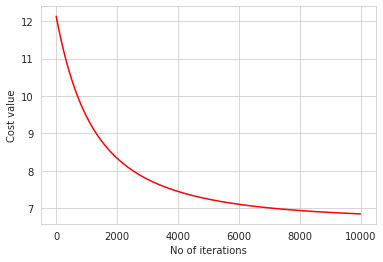

Accuracy of training data is  0.8142857142857143
Accuracy of testing data is  0.8
F1 score of training data is  0.7936507936507938
F1 score of testing data is  0.8125000000000001


In [ ]:
regressor=Logistic(alpha=0.001,no_of_iterations=10000)
regressor.fit(X_train,y_train)
y_train_pred=regressor.predict(X_train)
y_test_pred=regressor.predict(X_test)

print("Accuracy of training data is ",accuracy(y_train,y_train_pred))
print("Accuracy of testing data is ",accuracy(y_test,y_test_pred))

from sklearn.metrics import f1_score
print("F1 score of training data is ",f1_score(y_train,y_train_pred))
print("F1 score of testing data is ",f1_score(y_test,y_test_pred))

Comparing with sklearn logistic regression


In [ ]:
from sklearn.linear_model import LogisticRegression
Le=LogisticRegression()
Le.fit(X_train,y_train)
y_train_pred=Le.predict(X_train)
y_test_pred=Le.predict(X_test)

print("Accuracy of training data with sklearn is ",accuracy(y_train,y_train_pred))
print("Accuracy of testing data with sklearn is ",accuracy(y_test,y_test_pred))

from sklearn.metrics import f1_score
print("F1 score of training data with sklearn is ",f1_score(y_train,y_train_pred))
print("F1 score of testing data with sklearn is ",f1_score(y_test,y_test_pred))

Accuracy of training data with sklearn is  0.8285714285714286
Accuracy of testing data with sklearn is  0.8
F1 score of training data with sklearn is  0.8064516129032258
F1 score of testing data with sklearn is  0.8125000000000001


#Iris dataset


In [ ]:
df=pd.read_csv("/content/drive/MyDrive/ML-1 /Iris.csv")

df


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [ ]:
df.drop(['Id'],axis=1,inplace=True)
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [ ]:
df['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

Plotting the scatter plots


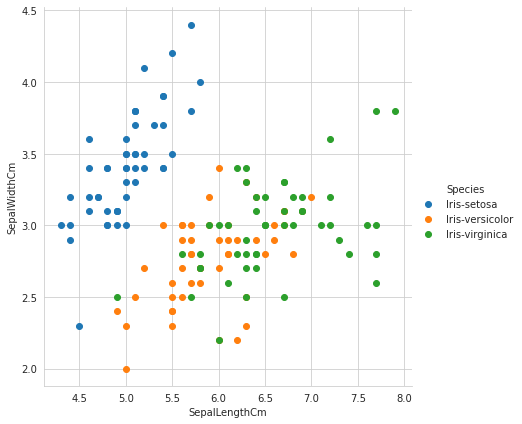

In [ ]:


sns.FacetGrid(df, hue ="Species",height = 6).map(plt.scatter,'SepalLengthCm','SepalWidthCm').add_legend()

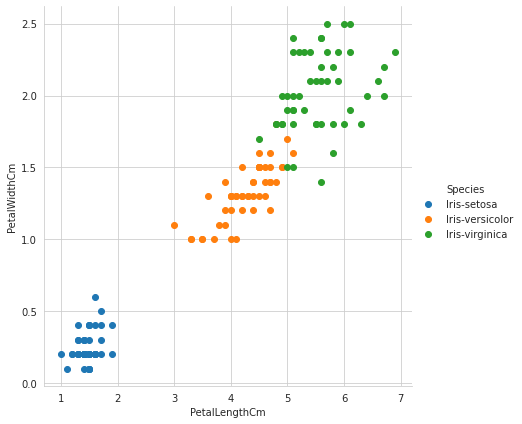

In [ ]:
sns.FacetGrid(df, hue ="Species",height = 6).map(plt.scatter,'PetalLengthCm','PetalWidthCm').add_legend()

In [ ]:
df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

Spliting into features and labels


In [ ]:
X=df.iloc[:,:-1]
Y=df.iloc[:,-1]
print("Shape of Y ",Y.shape)
print("Shape of X ",X.shape)

Shape of Y  (150,)
Shape of X  (150, 4)


Label encoding

In [ ]:
from sklearn.preprocessing import LabelEncoder
Le=LabelEncoder()
Y=Le.fit_transform(Y)
Y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

Logistic using sklearn

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.3,random_state=50)

Without Regularization

Accuracy on training data  0.9809523809523809
Accuracy on testing data  0.9777777777777777
The f1 score on testing data is  0.9778242192035296


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


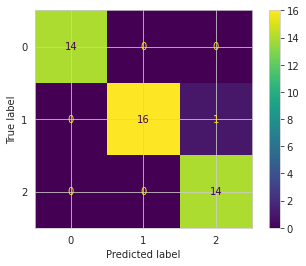

In [ ]:
from sklearn.linear_model import  LogisticRegression
model=LogisticRegression(multi_class='multinomial')
model.fit(X_train,y_train)
y_test_pred=model.predict(X_test)
y_train_pred=model.predict(X_train)

from sklearn.metrics import accuracy_score,confusion_matrix,f1_score,plot_confusion_matrix


ac_train=accuracy_score(y_train,y_train_pred)
print("Accuracy on training data ",ac_train)

ac_test=accuracy_score(y_test,y_test_pred)
print("Accuracy on testing data ",ac_test)

f1=f1_score(y_test,y_test_pred,average='weighted')


print("The f1 score on testing data is ",f1)
plot_confusion_matrix(model,X_test,y_test)

With Regularization

Accuracy on training data  0.9809523809523809
Accuracy on testing data  0.9777777777777777
The f1 score on testing data is  0.9778242192035296


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


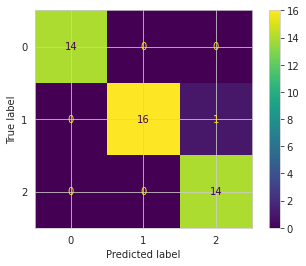

In [ ]:
from sklearn.linear_model import  LogisticRegression
model=LogisticRegression(penalty="l2",multi_class='multinomial')
model.fit(X_train,y_train)
y_test_pred=model.predict(X_test)
y_train_pred=model.predict(X_train)

from sklearn.metrics import accuracy_score,confusion_matrix,f1_score,plot_confusion_matrix


ac_train=accuracy_score(y_train,y_train_pred)
print("Accuracy on training data ",ac_train)

ac_test=accuracy_score(y_test,y_test_pred)
print("Accuracy on testing data ",ac_test)

f1=f1_score(y_test,y_test_pred,average='weighted')


print("The f1 score on testing data is ",f1)
plot_confusion_matrix(model,X_test,y_test)


#Airlines dataset


In [ ]:
df_train=pd.read_csv('/content/drive/MyDrive/ML-1 /Airlines/train.csv')
df_train

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,103899,94171,Female,disloyal Customer,23,Business travel,Eco,192,2,1,...,2,3,1,4,2,3,2,3,0.0,neutral or dissatisfied
103900,103900,73097,Male,Loyal Customer,49,Business travel,Business,2347,4,4,...,5,5,5,5,5,5,4,0,0.0,satisfied
103901,103901,68825,Male,disloyal Customer,30,Business travel,Business,1995,1,1,...,4,3,2,4,5,5,4,7,14.0,neutral or dissatisfied
103902,103902,54173,Female,disloyal Customer,22,Business travel,Eco,1000,1,1,...,1,4,5,1,5,4,1,0,0.0,neutral or dissatisfied


In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         103904 non-null  int64  
 1   id                                 103904 non-null  int64  
 2   Gender                             103904 non-null  object 
 3   Customer Type                      103904 non-null  object 
 4   Age                                103904 non-null  int64  
 5   Type of Travel                     103904 non-null  object 
 6   Class                              103904 non-null  object 
 7   Flight Distance                    103904 non-null  int64  
 8   Inflight wifi service              103904 non-null  int64  
 9   Departure/Arrival time convenient  103904 non-null  int64  
 10  Ease of Online booking             103904 non-null  int64  
 11  Gate location                      1039


Removing Unnamed and id column

In [ ]:
df_train.drop(['Unnamed: 0','id'],axis=1,inplace=True)
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Gender                             103904 non-null  object 
 1   Customer Type                      103904 non-null  object 
 2   Age                                103904 non-null  int64  
 3   Type of Travel                     103904 non-null  object 
 4   Class                              103904 non-null  object 
 5   Flight Distance                    103904 non-null  int64  
 6   Inflight wifi service              103904 non-null  int64  
 7   Departure/Arrival time convenient  103904 non-null  int64  
 8   Ease of Online booking             103904 non-null  int64  
 9   Gate location                      103904 non-null  int64  
 10  Food and drink                     103904 non-null  int64  
 11  Online boarding                    1039

Removing NaN values

In [ ]:
df_train.isna().sum()

Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             310
satisfaction                           0
dtype: int64

In [ ]:
df_train=df_train.dropna()
df_train.isna().sum()

Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
satisfaction                         0
dtype: int64

Label encoding of 
Gender,Customer type,Type of travel,Class,satisfaction


In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
#Label encoding satisfaction feature
df_train.iloc[:,-1]=le.fit_transform(df_train.iloc[:,-1])

#Label encoding features
df_train.iloc[:,0]=le.fit_transform(df_train.iloc[:,0])
df_train.iloc[:,1]=le.fit_transform(df_train.iloc[:,1])
df_train.iloc[:,3]=le.fit_transform(df_train.iloc[:,3])
df_train.iloc[:,4]=le.fit_transform(df_train.iloc[:,4])


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


Same EDA for test dataset

In [ ]:
df_test=pd.read_csv('/content/drive/MyDrive/ML-1 /Airlines/test.csv')
df_test

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,19556,Female,Loyal Customer,52,Business travel,Eco,160,5,4,...,5,5,5,5,2,5,5,50,44.0,satisfied
1,1,90035,Female,Loyal Customer,36,Business travel,Business,2863,1,1,...,4,4,4,4,3,4,5,0,0.0,satisfied
2,2,12360,Male,disloyal Customer,20,Business travel,Eco,192,2,0,...,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,3,77959,Male,Loyal Customer,44,Business travel,Business,3377,0,0,...,1,1,1,1,3,1,4,0,6.0,satisfied
4,4,36875,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,...,2,2,2,2,4,2,4,0,20.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25971,25971,78463,Male,disloyal Customer,34,Business travel,Business,526,3,3,...,4,3,2,4,4,5,4,0,0.0,neutral or dissatisfied
25972,25972,71167,Male,Loyal Customer,23,Business travel,Business,646,4,4,...,4,4,5,5,5,5,4,0,0.0,satisfied
25973,25973,37675,Female,Loyal Customer,17,Personal Travel,Eco,828,2,5,...,2,4,3,4,5,4,2,0,0.0,neutral or dissatisfied
25974,25974,90086,Male,Loyal Customer,14,Business travel,Business,1127,3,3,...,4,3,2,5,4,5,4,0,0.0,satisfied


In [ ]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25976 entries, 0 to 25975
Data columns (total 25 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Unnamed: 0                         25976 non-null  int64  
 1   id                                 25976 non-null  int64  
 2   Gender                             25976 non-null  object 
 3   Customer Type                      25976 non-null  object 
 4   Age                                25976 non-null  int64  
 5   Type of Travel                     25976 non-null  object 
 6   Class                              25976 non-null  object 
 7   Flight Distance                    25976 non-null  int64  
 8   Inflight wifi service              25976 non-null  int64  
 9   Departure/Arrival time convenient  25976 non-null  int64  
 10  Ease of Online booking             25976 non-null  int64  
 11  Gate location                      25976 non-null  int

In [ ]:
df_test.drop(['Unnamed: 0','id'],axis=1,inplace=True)
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25976 entries, 0 to 25975
Data columns (total 23 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Gender                             25976 non-null  object 
 1   Customer Type                      25976 non-null  object 
 2   Age                                25976 non-null  int64  
 3   Type of Travel                     25976 non-null  object 
 4   Class                              25976 non-null  object 
 5   Flight Distance                    25976 non-null  int64  
 6   Inflight wifi service              25976 non-null  int64  
 7   Departure/Arrival time convenient  25976 non-null  int64  
 8   Ease of Online booking             25976 non-null  int64  
 9   Gate location                      25976 non-null  int64  
 10  Food and drink                     25976 non-null  int64  
 11  Online boarding                    25976 non-null  int

Removing NaN values

In [ ]:
df_test.isna().sum()

Gender                                0
Customer Type                         0
Age                                   0
Type of Travel                        0
Class                                 0
Flight Distance                       0
Inflight wifi service                 0
Departure/Arrival time convenient     0
Ease of Online booking                0
Gate location                         0
Food and drink                        0
Online boarding                       0
Seat comfort                          0
Inflight entertainment                0
On-board service                      0
Leg room service                      0
Baggage handling                      0
Checkin service                       0
Inflight service                      0
Cleanliness                           0
Departure Delay in Minutes            0
Arrival Delay in Minutes             83
satisfaction                          0
dtype: int64

In [ ]:
df_test=df_test.dropna()
df_test.isna().sum()

Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
satisfaction                         0
dtype: int64

Label encoding

In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
#Label encoding satisfaction feature
df_test.iloc[:,-1]=le.fit_transform(df_test.iloc[:,-1])

#Label encoding features
df_test.iloc[:,0]=le.fit_transform(df_test.iloc[:,0])
df_test.iloc[:,1]=le.fit_transform(df_test.iloc[:,1])
df_test.iloc[:,3]=le.fit_transform(df_test.iloc[:,3])
df_test.iloc[:,4]=le.fit_transform(df_test.iloc[:,4])

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


Checking the target feature

In [ ]:
df_test.iloc[:,-1].value_counts()

0    14528
1    11365
Name: satisfaction, dtype: int64

In [ ]:
from sklearn.linear_model import  LogisticRegression
model=LogisticRegression()
X_train=df_train.iloc[:,:-1].values
X_test=df_test.iloc[:,:-1].values
y_train=df_train.iloc[:,-1].values
y_test=df_test.iloc[:,-1].values
model.fit(X_train,y_train)
y_test_pred=model.predict(X_test)
y_train_pred=model.predict(X_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [ ]:
from sklearn.metrics import accuracy_score,f1_score
ac_test=accuracy_score(y_test,y_test_pred)
ac_train=accuracy_score(y_train,y_train_pred)

print("The accuracy on testing data is: ",ac_test)
print("The accuracy on training data is: ",ac_train)

f_train=f1_score(y_train,y_train_pred)
f_test=f1_score(y_test,y_test_pred)
print("The f1score of testing data is: ",f_test)
print("The f1score of testing data is: ",f_train)

The accuracy on testing data is:  0.8175568686517591
The accuracy on training data is:  0.8173156746529722
The f1score of testing data is:  0.7980851427594462
The f1score of testing data is:  0.7957917453466414
